# K-Means Clustering

*K-Means Clustering* adalah salah satu algoritma yang ada dalam klasifikasi. *K-Means Clustering* sendiri memiliki sifat *unsupervosed learning*. *K-Means* berujuan untuk mengelompokkan data menjadi cluster dengan berdasarkan nilai *K* terdekat.  

Dalam penerapannya dalam python ada pun tahapan atau proses yang perlu dilalui, yakni :
1. Import Library
2. Load Dataset
3. *Pre-Processing*
4. TF
5. Reduksi Dimensi
6. Mencari nilai K
7. K-Means Clustering
8. Menampilkan Cluster
9. Visualisasi Cluster

Dalam proses yang akan dilakukan untuk tahapan Import Library, Load Dataset, dan *Pre-Processing* adalah proses yang sama dengan topik sebelumnya. Untuk prosesnya dapat disimak dan dibaca seperti di tahapan di bawah ini :

# Import Library

Sama halnya dengan proses *Pre-processing* pada umumnya, yakni melakukan import library yang akan digunakan dalam proses *Pre-processing*.

Apa saja yang diimport? dapat dilihat seperti di bawah ini.

In [1]:
import pandas as pd
import numpy as np
#Import Library untuk Tokenisasi
import string 
import re #regex library
import matplotlib.pyplot as plt
import seaborn as sns

# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


from sklearn.cluster import KMeans

# Load Dataset

Tidak lupa tahapan selanjutnya yakni me-Load Dataset yang akan digunakan dalam proses selanjutnya. 
 
Dan berikut ini merupakan tampilan data yang akan digunakan.

In [2]:
data_berita = pd.read_csv('crawlUAS.csv')
data_berita.head()

,Judul,Penulis,Dospem 1,Dospem 2,Abstraksi,Abstraction,Link Download
0,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",Abstrak\r\nPenelitian ini menggunakan metode k...,Abstract\r\nThis research use quantitative met...,https://pta.trunojoyo.ac.id/uploads/journals/0...
1,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",Aplikasi nyata pemanfaatan teknologi informasi...,Academic portal system in University of Trunoj...,https://pta.trunojoyo.ac.id/uploads/journals/1...
2,"PENGARUH PERSEPSI MANFAAT, PERSEPSI KEMUDAHAN,...",Ahmad,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",Tujuan penelitian ini adalah untuk mengidentif...,The purpose of this research was to identify v...,https://pta.trunojoyo.ac.id/uploads/journals/0...
3,PENGARUH PENGEMBANGAN KARIR TERHADAP SEMANGAT ...,Danial Aziz M.YD,"Dr. Hj. Iriani Ismail, Dra.,MM","Drs. Ec. Mudji Kuswinarno, M.Si",PLN merupakan Badan Usaha Milik Negara yang be...,PLN is a state-owned enterprise dealy with the...,https://pta.trunojoyo.ac.id/uploads/journals/0...
4,PENGARUH FAKTOR-FAKTOR STRES KERJA TERHADAP DI...,Saiful Rahman,"Dr. Muhammad Alkirom Wildan,S.E.,M.Si","Helmi Buyung Aulia,S.ST.,S.E.,M.MT",\r\n\r\nPenelitian ini bertujuan untuk mengeta...,\r\n\r\nThis study aimed to determine the effe...,https://pta.trunojoyo.ac.id/uploads/journals/0...


# Pre-Processing

*Pre-Processing* merupakan tahapan awal yang sering dilakukan guna data yang tadinya mentah dan masih belum *clean* menjadi data yang *clean* dan bagus sehingga hasil yang didapatkan saat pemrosesan memiliki hasil yang maksimal.

# Case Folding

Selanjutnya yakni tahapan *Pre-Processing* yang dilakukan yakni *Case Folding*. *Case Folding* sendiri memiliki fungsi untuk mengubah huruf kapital yang ada dalam data menjadi huruf kecil, sehingga menjadi seragam.

In [3]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
data_berita['Abstraksi'] = data_berita['Abstraksi'].str.lower()


print('Case Folding Result : \n')
print(data_berita['Abstraksi'].head(20))
print('\n\n\n')

Case Folding Result : 

0     abstrak\r\npenelitian ini menggunakan metode k...
1     aplikasi nyata pemanfaatan teknologi informasi...
2     tujuan penelitian ini adalah untuk mengidentif...
3     pln merupakan badan usaha milik negara yang be...
4     \r\n\r\npenelitian ini bertujuan untuk mengeta...
5     munculnya asumsi bahwa lahirnya budaya mengemi...
6     muhammad sholeh, pengaruh iklan di televisi te...
7     atribut produk memberikan pandangan atau gamba...
8     ulfiyatun mutohharoh, “analisis faktor-faktor ...
9     \r\ntujuan penelitian ini adalah untuk mengana...
10    anissa novianti. 090211100010. pengaruh atribu...
11    devi kurniawati, pengaruh earning per share, n...
12    \r\ntujuan penelitian ini adalah (1) untuk men...
13    tujuan penelitian ini adalah untuk mengetahui ...
14    dwi suhardianto (2013), “pengaruh karakteristi...
15    farid,  pengaruh  periklanan di media televisi...
16    abstrak\r\n\r\npengaruh kecerdasan emosional t...
17    \r\n\r\npenelitian

# Tokenisasi

*Tokenisasi* memilik fungsi untuk memotong sebuah kalimat yang ada dalam data menjadi sebuah kata, dan *Tokenisasi* masuk dalam tahapan *Pre-Processing*

In [4]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
data_berita['Abstraksi'] = data_berita['Abstraksi'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return re.sub(r"\d+", "", text)

data_berita['Abstraksi'] = data_berita['Abstraksi'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data_berita['Abstraksi'] = data_berita['Abstraksi'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data_berita['Abstraksi'] = data_berita['Abstraksi'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data_berita['Abstraksi'] = data_berita['Abstraksi'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data_berita['Abstraksi'] = data_berita['Abstraksi'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_berita['Abstraksi_tokens'] = data_berita['Abstraksi'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(data_berita['Abstraksi_tokens'].head(20))
print('\n\n\n')

Tokenizing Result : 

0     [abstrak, penelitian, ini, menggunakan, metode...
1     [aplikasi, nyata, pemanfaatan, teknologi, info...
2     [tujuan, penelitian, ini, adalah, untuk, mengi...
3     [pln, merupakan, badan, usaha, milik, negara, ...
4     [penelitian, ini, bertujuan, untuk, mengetahui...
5     [munculnya, asumsi, bahwa, lahirnya, budaya, m...
6     [muhammad, sholeh, pengaruh, iklan, di, televi...
7     [atribut, produk, memberikan, pandangan, atau,...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [tujuan, penelitian, ini, adalah, untuk, menga...
10    [anissa, novianti, pengaruh, atribut, produk, ...
11    [devi, kurniawati, pengaruh, earning, per, sha...
12    [tujuan, penelitian, ini, adalah, untuk, menge...
13    [tujuan, penelitian, ini, adalah, untuk, menge...
14    [dwi, suhardianto, pengaruh, karakteristik, in...
15    [farid, pengaruh, periklanan, di, media, telev...
16    [abstrak, pengaruh, kecerdasan, emosional, ter...
17    [penelitian, ini, be

# Menghitung Frekuensi Distribusi Token

Tahap selanjutnya yakni, menghitung frekusensi pada setiap distribusi token yang ada dalam data (Abstarksi).

In [5]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

data_berita['Abstraksi_tokens_fdist'] = data_berita['Abstraksi_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(data_berita['Abstraksi_tokens_fdist'].head(20).apply(lambda x : x.most_common()))

Frequency Tokens : 

0     [(variabel, 10), (yang, 8), (ini, 7), (hipotes...
1     [(dan, 8), (akademik, 8), (portal, 5), (kepuas...
2     [(menggunakan, 6), (persepsi, 6), (internet, 5...
3     [(yang, 7), (pln, 5), (penelitian, 5), (kerja,...
4     [(stressor, 9), (kerja, 6), (disiplin, 4), (ya...
5     [(yang, 13), (budaya, 9), (pengemis, 6), (yait...
6     [(pesan, 9), (terhadap, 6), (pengaruh, 5), (un...
7     [(produk, 20), (motor, 12), (yang, 8), (honda,...
8     [(yang, 16), (produk, 10), (online, 9), (fakto...
9     [(jembatan, 5), (suramadu, 5), (dan, 4), (peng...
10    [(kamal, 14), (dan, 10), (atribut, 8), (produk...
11    [(dan, 10), (yang, 7), (terhadap, 6), (harga, ...
12    [(pesan, 18), (dan, 6), (minat, 6), (beli, 6),...
13    [(yang, 14), (citra, 10), (image, 8), (penelit...
14    [(dan, 15), (yang, 13), (prestasi, 7), (kerja,...
15    [(pesan, 9), (pengaruh, 5), (yang, 5), (terhad...
16    [(kecerdasan, 8), (kerja, 7), (dan, 7), (prest...
17    [(merek, 9), (dan, 9)

# Stopword

*Stopword* merupakan hal yang tidak dilewatkan dalam *Pre-Processing*. *Stopword* sendiri memiliki fungsi untuk menghapuskan kata-kata yang dirasa kurang memiliki makna dalam sebuah kalimat, seperti contoh : dan, di, yang, dan masih banyak lainnya.

In [6]:
from nltk.corpus import stopwords
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("crawlUAS.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_berita['Abstraksi_tokens_WSW'] = data_berita['Abstraksi_tokens'].apply(stopwords_removal) 


print(data_berita['Abstraksi_tokens_WSW'].head(20))

0     [abstrak, penelitian, metode, kuantitatif, men...
1     [aplikasi, nyata, pemanfaatan, teknologi, info...
2     [tujuan, penelitian, mengidentifikasi, variabe...
3     [pln, badan, usaha, milik, negara, bergerak, b...
4     [penelitian, bertujuan, pengaruh, faktorfaktor...
5     [munculnya, asumsi, lahirnya, budaya, mengemis...
6     [muhammad, sholeh, pengaruh, iklan, televisi, ...
7     [atribut, produk, pandangan, gambaran, produk,...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [tujuan, penelitian, menganalisis, atribut, ku...
10    [anissa, novianti, pengaruh, atribut, produk, ...
11    [devi, kurniawati, pengaruh, earning, share, n...
12    [tujuan, penelitian, pengaruh, pesan, iklan, t...
13    [tujuan, penelitian, pengaruh, variabel, brand...
14    [dwi, suhardianto, pengaruh, karakteristik, in...
15    [farid, pengaruh, periklanan, media, televisi,...
16    [abstrak, pengaruh, kecerdasan, emosional, pre...
17    [penelitian, bertujuan, pengaruh, citra, m

# Normalisasi

Normalisasi merupakan salah satu tahapan yang ada dalam pre-processing. Normalisasi memiliki fungsi untuk menyamakan nilai yang ada dalam data dalam rentan tertentu.

In [7]:
normalizad_word = pd.read_csv("crawlUAS.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data_berita['Abstraksi_normalized'] = data_berita['Abstraksi_tokens_WSW'].apply(normalized_term)

data_berita['Abstraksi_normalized'].head(20)

0     [abstrak, penelitian, metode, kuantitatif, men...
1     [aplikasi, nyata, pemanfaatan, teknologi, info...
2     [tujuan, penelitian, mengidentifikasi, variabe...
3     [pln, badan, usaha, milik, negara, bergerak, b...
4     [penelitian, bertujuan, pengaruh, faktorfaktor...
5     [munculnya, asumsi, lahirnya, budaya, mengemis...
6     [muhammad, sholeh, pengaruh, iklan, televisi, ...
7     [atribut, produk, pandangan, gambaran, produk,...
8     [ulfiyatun, mutohharoh, analisis, faktorfaktor...
9     [tujuan, penelitian, menganalisis, atribut, ku...
10    [anissa, novianti, pengaruh, atribut, produk, ...
11    [devi, kurniawati, pengaruh, earning, share, n...
12    [tujuan, penelitian, pengaruh, pesan, iklan, t...
13    [tujuan, penelitian, pengaruh, variabel, brand...
14    [dwi, suhardianto, pengaruh, karakteristik, in...
15    [farid, pengaruh, periklanan, media, televisi,...
16    [abstrak, pengaruh, kecerdasan, emosional, pre...
17    [penelitian, bertujuan, pengaruh, citra, m

# Stemming

*Stemming* memiliki fungsi atau kegunaan untuk mengubah sebuah kata menjadi kata dasar atau menjadi baku saja. Sehingga tidak memiliki imbuhan.

In [8]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data_berita['Abstraksi_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_berita['Abstraksi_tokens_stemmed'] = data_berita['Abstraksi_normalized'].swifter.apply(get_stemmed_term)
print(data_berita['Abstraksi_tokens_stemmed'])

7548
------------------------
abstrak : abstrak
penelitian : teliti
metode : metode
kuantitatif : kuantitatif
menekankan : tekan
pengujian : uji
hipotesis : hipotesis
variabel : variabel
kepemimpinanx : kepemimpinanx
kompensasi : kompensasi
dilaksanakan : laksana
kantor : kantor
dinas : dinas
pendidikan : didik
kabupaten : kabupaten
sampang : sampang
sampel : sampel
orang : orang
pegawai : pegawai
negeri : negeri
sipil : sipil
non : non
pns : pns
bebas : bebas
bersamasama : bersamasama
hubungan : hubung
signifikan : signifikan
simultan : simultan
kepemimpinan : pimpin
kinerja : kerja
terbukti : bukti
nilai : nilai
fhitung : fhitung
tingkat : tingkat
pengaruh : pengaruh
dominan : dominan
hitung : hitung
positif : positif
parsial : parsial
terikat : ikat
kesimpulan : simpul
berdasarkan : dasar
statistik : statistik
memiliki : milik
membuktikan : bukti
berpengaruh : pengaruh
kunci : kunci
aplikasi : aplikasi
nyata : nyata
pemanfaatan : manfaat
teknologi : teknologi
informasi : informasi
k

kepercayaan : percaya
komitmen : komitmen
patner : patner
adira : adira
dinamika : dinamika
multi : multi
finance : finance
tbk : tbk
dra : dra
hj : hj
anugrahini : anugrahini
ec : ec
kuswinanrno : kuswinanrno
penlitian : penlitian
survai : survai
tehnik : tehnik
penarikan : tari
quota : quota
dianalisis : analis
jalur : jalur
path : path
usahanya : usaha
kamalia : kamalia
marketing : marketing
mix : mix
sentra : sentra
mutira : mutira
batik : batik
meliputi : liput
lokasi : lokasi
penelitiannya : teliti
mutiara : mutiara
survey : survey
bebasnya : bebas
terikatnya : ikat
probability : probability
realibilitas : realibilitas
men : men
guji : guji
varabel : varabel
squere : squere
variasi : variasi
diluar : luar
keempat : empat
berdasrkan : berdasrkan
achmad : achmad
sulaiman : sulaiman
keuangan : uang
kpri : kpri
eka : eka
karsa : karsa
tinjau : tinjau
aspek : aspek
perputaran : putar
piutang : piutang
kas : kas
profitabilitasdibawah : profitabilitasdibawah
chairul : chairul
anam : ana

tunggal : tunggal
benarbenar : benarbenar
aktiva : aktiva
expected : expected
self : self
efficacy : efficacy
magnitude : magnitude
generality : generality
strength : strength
berprestasi : prestasi
mawapres : mawapres
temuan : temu
teridiri : teridiri
kebenaran : benar
wilayah : wilayah
barat : barat
abtrak : abtrak
uswatun : uswatun
khasanah : khasanah
etos : etos
presatasi : presatasi
ptpln : ptpln
diatribusi : diatribusi
jawa : jawa
timur : timur
mojokerto : mojokerto
dibagikan : bagi
semanagt : semanagt
rangka : rangka
meniliti : meniliti
pos : pos
perubahan : ubah
kebenarannya : benar
finansial : finansial
nonfinansial : nonfinansial
credit : credit
risk : risk
npl : npl
pd : pd
bpr : bpr
daerah : daerah
resiko : resiko
dikatagorikan : dikatagorikan
ketentuan : tentu
syarat : syarat
performing : performing
loan : loan
barokah : barokah
prambon : prambon
kehandalan : kehandalan
tanggap : tanggap
dharma : dharma
abidin : abidin
syahkesimpulan : syahkesimpulan
tipe : tipe
autoritari

berinvestasi : investasi
mva : mva
kekayaan : kaya
dihasilkan : hasil
penghasilan : hasil
pemegang : pegang
pemilik : milik
prospek : prospek
tingginya : tinggi
sensitivitas : sensitivitas
mita : mita
anggun : anggun
pratiwi : pratiwi
kosmetik : kosmetik
wardah : wardah
muhamad : muhamad
penelitin : penelitin
ditimbulkan : timbul
sosail : sosail
mahasiswi : mahasiswi
makan : makan
lesehan : leseh
berkah : berkah
ilaahi : ilaahi
menganti : anti
faiqotul : faiqotul
muna : muna
responsibility : responsibility
semen : semen
sudarsono : sudarsono
level : level
significance : significance
linieritas : linieritas
csr : csr
milyar : milyar
sumirah : sumirah
ud : ud
budi : budi
kramat : kramat
tambrinmm : tambrinmm
chrismardanissimm : chrismardanissimm
tekhnik : tekhnik
relase : rase
kesatuan : satu
sisa : sisa
satuan : satu
menurun : turun
penjulannya : penjulannya
independent : independent
hipotesa : hipotesa
signifikasi : signifikasi
teruji : uji
miftahul : miftahul
rizki : rizki
anggaran : 

kamali : kamal
teh : teh
botol : botol
sosro : sosro
study : study
kontrak : kontrak
sapta : sapta
pusaka : pusaka
nusantara : nusantara
spgn : spgn
popuasi : popuasi
dilapangan : lapang
abd : abd
hakam : hakam
sunsilk : sunsilk
clean : clean
fresh : fresh
santri : santri
putri : putri
pondok : pondok
pesantren : pesantren
al : al
hikam : hikam
anik : anik
arismah : arismah
tulis : tulis
sendang : sendang
pengaruhcitra : pengaruhcitra
terhadapkeputusan : terhadapkeputusan
produku : produku
alfian : alfian
fachrezi : fachrezi
pindah : pindah
keja : keja
toserba : toserba
gading : gading
kuning : kuning
muji : muji
keterikatan : ikat
erat : erat
asumsikan : asumsi
pemenuhan : penuh
kebijakankebijakan : kebijakankebijakan
perasaan : asa
intentions : intentions
rekan : rekan
penelitia : penelitia
alasan : alas
risqiyatul : risqiyatul
maqfiroh : maqfiroh
mio : mio
soul : soul
trisakti : trisakti
seraca : seraca
bachrowi : bachrowi
yoghurt : yoghurt
cimory : cimory
cisarua : cisarua
mountain

bangkalanhasil : bangkalanhasil
rsebesar : rsebesar
yield : yield
rate : rate
investmen : investmen
even : even
yields : yields
rasionya : rasio
turun : turun
nilainya : nilai
berfluktuasi : fluktuasi
ldr : ldr
sisi : sisi
standard : standard
ainul : ainul
yaqin : yaqin
promotional : promotional
prabayar : prabayar
reliabiliitas : reliabiliitas
advertising : advertising
sales : sales
relation : relation
univeristas : univeristas
kapal : kapal
kendaraan : kendara
pengadaan : ada
wilauddin : wilauddin
profabilitas : profabilitas
keramik : keramik
porselen : porselen
kaca : kaca
diperkuat : kuat
dewasa : dewasa
pesatnya : pesat
ditandai : tanda
bertambah : tambah
dipasar : pasar
investasinya : investasi
diperdagangkan : dagang
dilantai : lantai
rentan : rentan
dimasa : masa
kaitanya : kaitanya
berorientasi : orientasi
kewajaran : wajar
tukar : tukar
internal : internal
untik : untik
idx : idx
bi : bi
imam : imam
humaini : humaini
directori : directori
batasan : batas
kriteriakriteria : kr

signfikan : signfikan
luqman : luqman
indoprima : indoprima
peneltian : peneltian
cluster : cluster
haris : haris
dhuha : dhuha
priambodo : priambodo
determinasihasil : determinasihasil
equityroe : equityroe
pbv : pbv
maratus : maratus
sholihah : sholihah
utari : utari
loyal : loyal
ketergantungan : gantung
merk : merk
menurunnya : turun
multikolonearitas : multikolonearitas
heteroskedastisitasregresi : heteroskedastisitasregresi
koefisisen : koefisisen
univeritas : univeritas
mimin : mimin
aspirasi : aspirasi
serikat : serikat
aspirasidan : aspirasidan
erika : erika
elva : elva
mardiana : mardiana
konsentrasi : konsentrasi
umi : umi
kulsum : kulsum
surabayadibawah : surabayadibawah
reparasi : reparasi
jl : jl
perak : perak
pabean : pabean
cantian : cantian
juliana : juliana
rizky : rizky
locus : locus
control : control
sdmterhadap : sdmterhadap
serba : serba
adjust : adjust
diponegoro : diponegoro
prinsipprinsip : prinsipprinsip
nilainilai : nilainilai
tertuang : tuang
keteladanan : t

membandingankan : membandingankan
mesinmesin : mesinmesin
forklip : forklip
cahyadi : cahyadi
abadi : abadi
sendiril : sendiril
gajii : gaji
mafazatun : mafazatun
evaliyati : evaliyati
amaniyahse : amaniyahse
sumbernya : sumber
besaran : besar
kemahasiswaan : mahasiswa
kemahasiswaanfakultas : kemahasiswaanfakultas
didiuga : didiuga
orientasi : orientasi
halim : halim
akbar : akbar
hafiludin : hafiludin
karier : karier
badak : badak
gadingrejo : gadingrejo
pasuruan : pasuruan
khoirul : khoirul
dara : dara
fhasil : fhasil
mafrudhatul : mafrudhatul
fitriyah : fitriyah
setia : setia
pamekasansampang : pamekasansampang
pemeliharaan : pelihara
proportionate : proportionate
novi : novi
personel : personel
polres : polres
ketertiban : tertib
penegakan : tega
perlindungan : lindung
pengayoman : ayom
komando : komando
polsek : polsek
tepatnya : tepat
jln : jln
soekarno : soekarno
hatta : hatta
kepolisian : polisi
tergabung : gabung
terhadapa : terhadapa
bangkalanberdasarkan : bangkalanberdasarka

woori : woori
saudara : saudara
mestika : mestika
parahyangan : parahyangan
bukopin : bukopin
jabar : jabar
banten : banten
renita : renita
arum : arum
krisvianika : krisvianika
properti : properti
pta : pta
mahmudi : mahmud
bidikmisi : bidikmisi
nita : nita
yumiarsih : yumiarsih
ainur : ainur
intrumen : intrumen
batubara : batubara
moderated : moderated
regression : regression
mra : mra
kendali : kendali
dipegang : pegang
terlibat : libat
meknisme : meknisme
involvement : involvement
ownership : ownership
antaralain : antaralain
umur : umur
uii : uii
age : age
sholikhah : sholikhah
labour : labour
ptcitra : ptcitra
terang : terang
dandrs : dandrs
kalangan : kalang
berniat : niat
munawarah : munawarah
religi : religi
makam : makam
asta : asta
drdrs : drdrs
pulau : pulau
keagamaan : agama
mengunjugi : mengunjugi
actdan : actdan
terkatnya : terkatnya
sanksi : sanksi
firda : firda
amaliah : amaliah
garmant : garmant
drsbambang : drsbambang
pendek : pendek
dibursa : bursa
terpilihlah : pil

overpricingpada : overpricingpada
perusahaanunderpricing : perusahaanunderpricing
pemikiran : pikir
variabelreputasi : variabelreputasi
underwriter : underwriter
prospektus : prospektus
financeuntuk : financeuntuk
bahri : bahri
banyuanyarpamekasan : banyuanyarpamekasan
berinovasi : inovasi
sohiburrida : sohiburrida
utuk : utuk
berpengaruhi : pengaruh
dianaisis : dianaisis
khoirun : khoirun
nasikh : nasikh
ooredoo : ooredoo
multikolonieritas : multikolonieritas
heterokedastisitas : heterokedastisitas
vii : vii
sigfikan : sigfikan
hidayatul : hidayatul
muslimah : muslimah
obligasi : obligasi
rating : rating
ytm : ytm
nirwan : nirwan
syahri : syahri
ben : ben
abdur : abdur
pelayaran : layar
sayusan : sayusan
bahari : bahari
terbuka : buka
lebar : lebar
berkecimpung : kecimpung
ni : ni
keagenan : agen
sae : sae
gunung : gunung
wantar : wantar
efe : efe
evaluation : evaluation
ife : ife
strengths : strengths
weaknesses : weaknesses
opportunities : opportunities
threats : threats
internalext

akh : akh
taufikurrahman : taufikurrahman
telkomsel : telkomsel
analisisregresi : analisisregresi
bangunan : bangun
took : took
insecurity : insecurity
organik : organik
manunggal : manunggal
kerjansebagai : kerjansebagai
fitra : fitra
akbari : akbar
pranjotose : pranjotose
perbadaan : bada
stok : stok
invesmnet : invesmnet
jamilatul : jamilatul
stratifiedcluster : stratifiedcluster
mukhlis : mukhlis
indoenesia : indoenesia
richa : richa
takmir : takmir
remunerasi : remunerasi
engagement : engagement
harkan : harkan
respondenberdasarkan : respondenberdasarkan
firmansyah : firmansyah
logistik : logistik
nagelkerke : nagelkerke
mohkosim : mohkosim
pelabuhan : labuh
drsmudji : drsmudji
satfungsi : satfungsi
profitablitas : profitablitas
dta : dta
perpengaruh : pengaruh
punishment : punishment
department : department
cahaya : cahaya
plastindo : plastindo
sisma : sisma
ainun : ainun
nabilah : nabi
fitriah : fitriah
rahman : rahman
perusahaansub : perusahaansub
farmasiyang : farmasiyang
diba

menggunakananalisisregresi : menggunakananalisisregresi
berdasarkanhasilpenelitianmenyimpulkanbahwa : berdasarkanhasilpenelitianmenyimpulkanbahwa
variabelkomisarisindependen : variabelkomisarisindependen
dewandireksi : dewandireksi
kepemilikaninstitusional : kepemilikaninstitusional
signifikanterhadap : signifikanterhadap
keuanganperusahaan : keuanganperusahaan
makanandanminuman : makanandanminuman
sedangkepemilikanmanajerial : sedangkepemilikanmanajerial
berpengaruhterhadap : berpengaruhterhadap
keuanganperusahaanmakanandanminuman : keuanganperusahaanmakanandanminuman
kepemilikaninstitusionaldankepemilikanmanajerialberpengaruhsecara : kepemilikaninstitusionaldankepemilikanmanajerialberpengaruhsecara
kinerjakeuanganmakanandanminuman : kinerjakeuanganmakanandanminuman
kinerjakeuangan : kinerjakeuangan
dimas : mas
baiquni : baiquni
madya : madya
kontruksi : kontruksi
sugio : sugio
dampit : dampit
sumberejo : sumberejo
berdasarakan : berdasarakan
agris : agris
sport : sport
tethadap : tet

miftakhul : miftakhul
gedog : gedog
tuban : tuban
ana : ana
maidah : maidah
utilitas : utilitas
membiayai : biaya
debby : debby
febriyana : febriyana
sejatinya : sejati
dipimpinnya : pimpin
dipimpin : pimpin
islami : islami
disandarkan : sandar
alquran : alquran
hadist : hadist
bani : bani
hasyim : hasyim
bertempat : tempat
singosarimalang : singosarimalang
mendalam : dalam
garis : garis
dipertahankan : tahan
tabligh : tabligh
fatonah : fatonah
perannya : peran
panutan : panutan
perintis : rintis
pnyelaras : pnyelaras
pemberdaya : daya
ptsmelting : ptsmelting
mogok : mogok
unjuk : unjuk
phk : phk
xix : xix
diminimalkan : minimal
ketidakamanan : ketidakamanan
keingnan : keingnan
pangestu : pangestu
sebnayak : sebnayak
alalisis : alalisis
keluarpihak : keluarpihak
peruahaan : peruahaan
sealu : alu
memerhatikan : perhati
virna : virna
dias : dias
tdan : tdan
hosen : hosen
zulpah : zulpah
lbu : lbu
signiflkansi : signiflkansi
signmkan : signmkan
rizal : rizal
gazali : gazal
unstandarized :

cahyani : cahyani
kareb : kareb
kriiteria : kriiteria
menyebar : sebar
lokus : lokus
demografis : demografis
kematangan : matang
ix : ix
semster : semster
ade : ade
kurnia : kurnia
savitri : savitri
petikemas : petikemas
nilao : nilao
mafsusah : mafsusah
ridho : ridho
peusahaan : peusahaan
spesifikas : spesifikas
xnilai : xnilai
interaktif : interaktif
gandanya : ganda
abraham : abraham
maslow : maslow
jaksa : jaksa
suprapto : suprapto
lebak : lebak
simpel : simpel
seacara : acara
berkala : kala
samping : samping
pebedaan : beda
div : div
kaprang : kaprang
hangtuah : hangtuah
diperhatikanya : diperhatikanya
penyemangat : semangat
bekal : bekal
divkaprang : divkaprang
indonesiapersero : indonesiapersero
devisi : devisi
icmiah : icmiah
web : web
ujin : ujin
regeresi : regeresi
rosida : rosida
ningam : ningam
jatinom : jatinom
agri : agri
perusahaanya : perusahaanya
ambassador : ambassador
ecmudji : ecmudji
sandang : sandang
apparel : apparel
mengubah : ubah
ecommerce : ecommerce
konsumti

menyayangkan : sayang
tempuh : tempuh
destination : destination
jaddih : jaddih
tersebar : sebar
menunjukkanbahwasannya : menunjukkanbahwasannya
kelamahan : kelamahan
itemitem : itemitem
holistik : holistik
penggambaran : gambar
emosi : emosi
membangkitkan : bangkit
santai : santai
waswas : waswas
tenang : tenang
keamanannya : aman
distribution : distribution
diproduksi : produksi
katun : katun
logo : logo
memperbarui : baru
assfak : assfak
assyuhada : assyuhada
tema : tema
kekinian : kini
mengangkat : angkat
moral : moral
diindikasikan : indikasi
sandal : sandal
samplingyaitu : samplingyaitu
sedudo : sedudo
assistance : assistance
others : others
expressing : expressing
feelings : feelings
incentives : incentives
helping : helping
company : company
syaicullah : syaicullah
kokop : kokop
kukm : kukm
permkukmv : permkukmv
dream : dream
mosaic : mosaic
tumbuhnya : tumbuh
proaktif : proaktif
belom : bom
kerumitan : kerumit
indinesia : indinesia
ramdom : ramdom
kjinerja : kjinerja
terhadapo

Pandas Apply:   0%|          | 0/1019 [00:00<?, ?it/s]

0       [abstrak, teliti, metode, kuantitatif, tekan, ...
1       [aplikasi, nyata, manfaat, teknologi, informas...
2       [tuju, teliti, identifikasi, variabelvariabel,...
3       [pln, badan, usaha, milik, negara, gerak, bida...
4       [teliti, tuju, pengaruh, faktorfaktor, stres, ...
                              ...                        
1014    [umi, kholidah, pengaruh, arus, kas, operasi, ...
1015    [abstrak, ra, fajria, nurul, islami, pengaruh,...
1016    [riska, utami, ningsih, pengaruh, milik, insti...
1017    [dasar, hasil, teliti, nilai, square, besar, p...
1018    [laura, monica, analisis, pengaruh, likuiditas...
Name: Abstraksi_tokens_stemmed, Length: 1019, dtype: object


Berikut ini merupakan tampilan data yang telah dilakukan proses *Pre-Processing*

In [9]:
data_berita.head()

,Judul,Penulis,Dospem 1,Dospem 2,Abstraksi,Abstraction,Link Download,Abstraksi_tokens,Abstraksi_tokens_fdist,Abstraksi_tokens_WSW,Abstraksi_normalized,Abstraksi_tokens_stemmed
0,PENGARUH KEPEMIMPINAN DAN KOMPENSASI TERHADAP ...,Hendri Wahyudi Prayitno,"Dra. Hj. S Anugrahini Irawati, MM","Helmi Buyung Aulia,S,ST,SE,.MT",abstrak penelitian ini menggunakan metode kuan...,Abstract\r\nThis research use quantitative met...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[abstrak, penelitian, ini, menggunakan, metode...","{'abstrak': 1, 'penelitian': 4, 'ini': 7, 'men...","[abstrak, penelitian, metode, kuantitatif, men...","[abstrak, penelitian, metode, kuantitatif, men...","[abstrak, teliti, metode, kuantitatif, tekan, ..."
1,Pengukuran Website Quality Pada Situs Sistem A...,Muhammad Zakaria Utomo,"Dr. Ir. Nurita Andriani, MM","Nirma Kurriwati, SP, M.Si",aplikasi nyata pemanfaatan teknologi informasi...,Academic portal system in University of Trunoj...,https://pta.trunojoyo.ac.id/uploads/journals/1...,"[aplikasi, nyata, pemanfaatan, teknologi, info...","{'aplikasi': 1, 'nyata': 1, 'pemanfaatan': 1, ...","[aplikasi, nyata, pemanfaatan, teknologi, info...","[aplikasi, nyata, pemanfaatan, teknologi, info...","[aplikasi, nyata, manfaat, teknologi, informas..."
2,"PENGARUH PERSEPSI MANFAAT, PERSEPSI KEMUDAHAN,...",Ahmad,"Bambang Setiyo Pambudi, S.E., MM.","Fathor AS, S.E., MM.",tujuan penelitian ini adalah untuk mengidentif...,The purpose of this research was to identify v...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[tujuan, penelitian, ini, adalah, untuk, mengi...","{'tujuan': 1, 'penelitian': 4, 'ini': 3, 'adal...","[tujuan, penelitian, mengidentifikasi, variabe...","[tujuan, penelitian, mengidentifikasi, variabe...","[tuju, teliti, identifikasi, variabelvariabel,..."
3,PENGARUH PENGEMBANGAN KARIR TERHADAP SEMANGAT ...,Danial Aziz M.YD,"Dr. Hj. Iriani Ismail, Dra.,MM","Drs. Ec. Mudji Kuswinarno, M.Si",pln merupakan badan usaha milik negara yang be...,PLN is a state-owned enterprise dealy with the...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[pln, merupakan, badan, usaha, milik, negara, ...","{'pln': 5, 'merupakan': 2, 'badan': 1, 'usaha'...","[pln, badan, usaha, milik, negara, bergerak, b...","[pln, badan, usaha, milik, negara, bergerak, b...","[pln, badan, usaha, milik, negara, gerak, bida..."
4,PENGARUH FAKTOR-FAKTOR STRES KERJA TERHADAP DI...,Saiful Rahman,"Dr. Muhammad Alkirom Wildan,S.E.,M.Si","Helmi Buyung Aulia,S.ST.,S.E.,M.MT",penelitian ini bertujuan untuk mengetahui peng...,\r\n\r\nThis study aimed to determine the effe...,https://pta.trunojoyo.ac.id/uploads/journals/0...,"[penelitian, ini, bertujuan, untuk, mengetahui...","{'penelitian': 2, 'ini': 1, 'bertujuan': 1, 'u...","[penelitian, bertujuan, pengaruh, faktorfaktor...","[penelitian, bertujuan, pengaruh, faktorfaktor...","[teliti, tuju, pengaruh, faktorfaktor, stres, ..."


# TF-IDF

Tahapan awal dalam melakukan proses *K-Means Clustering* yakni menentukan nilai TF-IDF yang ada dalam data. Menghitung TF-IDF ini menggunakan matriks. Matriks ini memiliki fungsi guna menghitung stiap frekuensi dalam setiap kata yang ada. Dan juga memberikan bobot dalam data.

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
berita = []
for data in data_berita['Abstraksi_tokens_stemmed']:
    isi = ''
    for term in data:
        isi += term + ' '
    berita.append(isi)

vectorizer.fit(berita)

# Encode the Document
vector = vectorizer.transform(berita)

a= vectorizer.get_feature_names_out()

count = vector.toarray()
df = pd.DataFrame(data=count,columns = [a])

from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tf = tfidf.fit_transform(vectorizer.fit_transform(berita)).toarray()

dfp =pd.DataFrame(data=tf, index=list(range(1,len(tf[:,1])+1, )),columns=[a])
dfp

,aaa,aaaamanahsyariah,aar,abadi,abai,abalisis,abc,abcs,abd,abdul,...,zuhri,zuhruf,zulfi,zulia,zuliana,zulkifli,zulkiflimsi,zulpah,zy,zyn
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.068607,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Reduksi Dimensi

Setelah menghitunh nilai TF-IDFnya, kemudian *Reduksi Dimensi*. *Reduksi Dimensi* adalah proses dimana memiliki fungsi guna mengurangi fitur. *Reduksi Dimensi* menggunakan metode PCA. PCA sendiri merupakan kepanjangan dari (*Principal Component Analysis*) yang merupakan sebuah proeses untuk mengurangi tabel. 

Berikut merupakan penerapannya :

In [11]:
from sklearn.decomposition import PCA
df_pca = pd.DataFrame()
# initialize PCA with 2 components
pca = PCA(n_components=3, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(dfp)
# save our two dimensions into x0 and x1
df_pca['x0']=pca_vecs[:, 1]
df_pca['x1']=pca_vecs[:, 2]

In [12]:
df_pca

,x0,x1
0,0.131096,-0.002694
1,-0.073841,-0.031661
2,-0.094799,-0.027331
3,0.032559,0.012510
4,0.019843,-0.008683
...,...,...
1014,-0.043350,0.091430
1015,0.009166,-0.012560
1016,-0.056009,0.182616
1017,-0.058086,0.449206


# Mencari Nilai *k*

Setelah proses *Reduksi Dimensi* menggunakan PCA. Langkah selanjutnya yakni menentukan nilai *k*. *k* tersebut dicari nilai terbaiknya untuk menentukan cluster yang akan membentuk *K-Means Clustering*.

Pada penerapan dibawah, dilakukan looping sebanyak 10 kali untuk mendapatkan nilai *k* terbaiknya.

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

Kemudian dapat divisualisasikan aatau digambarkan dengan menggunakan *plot* seperti berikut ini

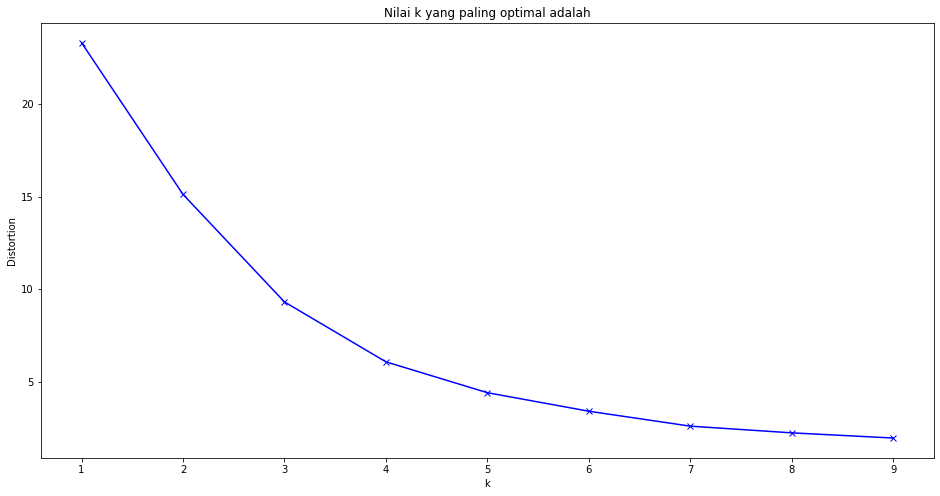

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Nilai k yang paling optimal adalah')
plt.show()

# K-Means Clustering

Selanjutnya yakni dalam menentukan *K-Means Clustering*. Dalam menentukan *K-Means Clustering* dalam python dapat dengan mudah dilakukan yakni dengan menggunakan library yang tersedia dalam python. Digunalan library **Sklearn** untuk proses *K-Means Clustering*.

Berikut ini merupakan penerapan *K-Means Clustering* dalam python, untuk clusternya sendiri menjadi 4 cluster.

In [15]:
from sklearn.cluster import KMeans

# iinisisalisasi dengan 3 centroid
kmeans = KMeans(n_clusters=4, random_state=42)
# fit the model
kmeans.fit(dfp)
# memsukan klaster ke variable
clusters = kmeans.labels_
kmeans.labels_

array([0, 3, 3, ..., 2, 2, 2])

# Menampilkan Hasil Cluster

Lalu untuk menampilkan hasil Cluster dapat dilakukan proses seperti di bawah ini.

Dengan menggunakan dataframe.

In [16]:
df_pca['cluster']=clusters
df_pca


,x0,x1,cluster
0,0.131096,-0.002694,0
1,-0.073841,-0.031661,3
2,-0.094799,-0.027331,3
3,0.032559,0.012510,0
4,0.019843,-0.008683,0
...,...,...,...
1014,-0.043350,0.091430,2
1015,0.009166,-0.012560,0
1016,-0.056009,0.182616,2
1017,-0.058086,0.449206,2


Hasil cluster juga dapat ditampilkan, dengan cara sebagai berikut ini

In [17]:
X = vectorizer.fit_transform(data_berita['Abstraksi'])
def get_top_keywords(n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # grup TF-IDF berdasarkan cluster
    terms = vectorizer.get_feature_names_out() # akses tf-idf
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) 
get_top_keywords(10)



Cluster 0
motivasi,berpengaruh,yang,variabel,sebesar,terhadap,dan,kinerja,karyawan,kerja

Cluster 1
harga,earning,yang,debt,dan,perusahaan,equity,return,saham,ratio

Cluster 2
indonesia,penelitian,keuangan,struktur,terhadap,modal,profitabilitas,yang,dan,perusahaan

Cluster 3
merek,penelitian,variabel,konsumen,terhadap,produk,yang,dan,pembelian,keputusan


# Visualisasi K-Means Cluster

Guna mempermudah mengetahui dan menganalisa hasil cluster dapat divisualisasikan seperti berikut ini.

Untuk visualisasinya sendiri menggunakan *Scatter Plot*

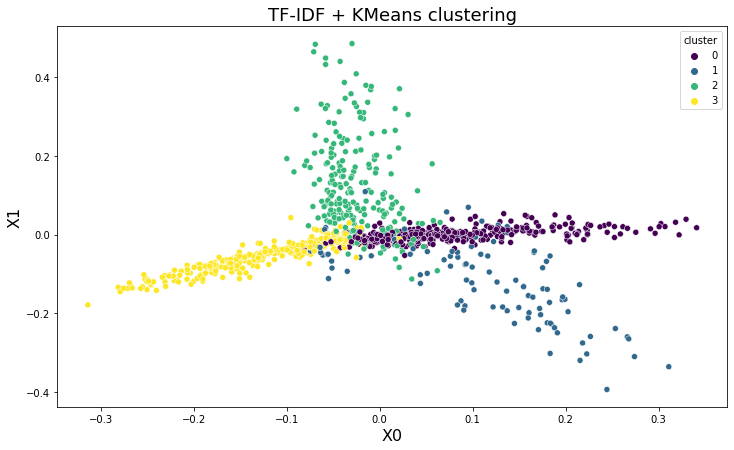

In [18]:
# m# map clusters to appropriate labels 
cluster_map = {0: 0, 1: 1, 2: 2,3:3}
# apply mapping
df_pca['cluster'] = df_pca['cluster'].map(cluster_map)

# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_pca, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()
